# Insurance Claims- Fraud Detection

## Problem Statement:

Business case:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, the dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

In this example, we will be working with some auto insurance data to demonstrate how we can create a predictive model that predicts if an insurance claim is fraudulent or not.

### Importing the required libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Automobile_insurance_fraud.csv')

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df['collision_type'] = df['collision_type'].replace({'?':np.nan})
df['property_damage'] = df['property_damage'].replace({"?":np.nan})
df['police_report_available'] = df['police_report_available'].replace({"?":np.nan})

In [4]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,NaN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [5]:
df.shape

(1000, 40)

In [6]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
df = df.drop(['_c39'], axis =1)

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [9]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [10]:
df['collision_type'] = df['collision_type'].fillna('Rear Collision')

In [11]:
df['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [12]:
df['property_damage'] = df['property_damage'].fillna('NO')

In [13]:
df['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [14]:
df['police_report_available'] = df['police_report_available'].fillna('NO')

In [15]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [16]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [17]:
df[["day", "Month", "Year"]] = df['policy_bind_date'].str.split("-", expand=True)

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day,Month,Year
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,6510,13020,52080,Saab,92x,2004,Y,17,10,2014
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,780,780,3510,Mercedes,E400,2007,Y,27,06,2006
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,7700,3850,23100,Dodge,RAM,2007,N,06,09,2000
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,05,1990
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1300,650,4550,Accura,RSX,2009,N,06,06,2014


In [18]:
df[["incident_day", "incident_month", "incident_year"]] = df['incident_date'].str.split("-", expand = True)

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_make,auto_model,auto_year,fraud_reported,day,Month,Year,incident_day,incident_month,incident_year
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,Saab,92x,2004,Y,17,10,2014,25,01,2015
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,Mercedes,E400,2007,Y,27,06,2006,21,01,2015
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,Dodge,RAM,2007,N,06,09,2000,22,02,2015
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,Chevrolet,Tahoe,2014,Y,25,05,1990,10,01,2015
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,Accura,RSX,2009,N,06,06,2014,17,02,2015


In [19]:
df = df.drop(['policy_bind_date', 'incident_date'], axis=1)

df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_make,auto_model,auto_year,fraud_reported,day,Month,Year,incident_day,incident_month,incident_year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,Saab,92x,2004,Y,17,10,2014,25,01,2015
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,Mercedes,E400,2007,Y,27,06,2006,21,01,2015
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,Dodge,RAM,2007,N,06,09,2000,22,02,2015
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,Chevrolet,Tahoe,2014,Y,25,05,1990,10,01,2015
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,Accura,RSX,2009,N,06,06,2014,17,02,2015


In [20]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage          

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In [22]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [23]:
fraud_per = (247/1000)*100

print('The percentage of fraud claims is ',fraud_per)

The percentage of fraud claims is  24.7


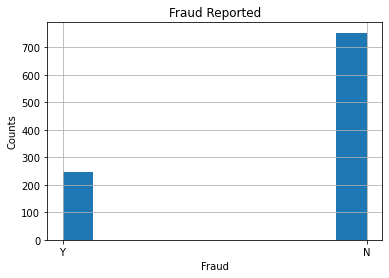

In [24]:
df['fraud_reported'].hist(grid=True)
plt.xlabel('Fraud')
plt.ylabel('Counts')
plt.title('Fraud Reported')
plt.show()

In [25]:
df['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

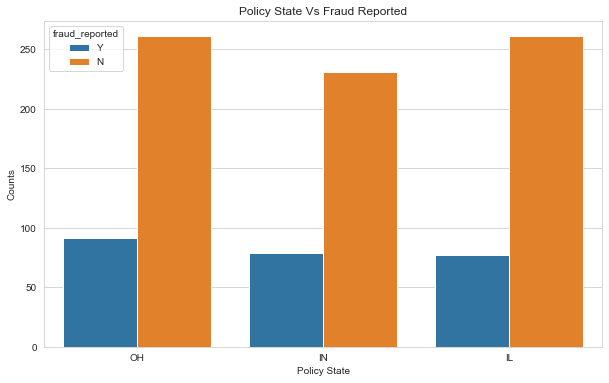

In [26]:
plt.figure(figsize=[10,6])
sns.set_style('whitegrid')
sns.countplot(x=df['policy_state'], hue=df['fraud_reported'], data=df)
plt.ylabel('Counts')
plt.xlabel('Policy State')
plt.title('Policy State Vs Fraud Reported')
plt.show()

In [27]:
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

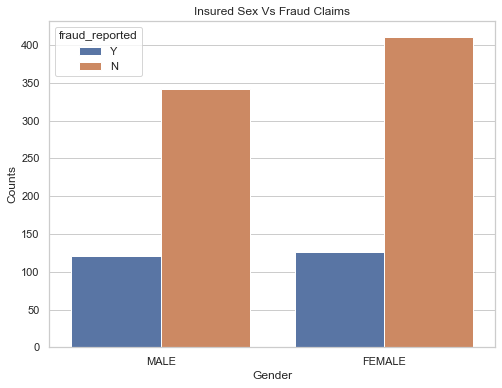

In [28]:
plt.figure(figsize=[8,6])
sns.set_theme(style="whitegrid")
sns.countplot(x=df['insured_sex'], hue=df['fraud_reported'], data=df)
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Insured Sex Vs Fraud Claims')
plt.show()

In [29]:
df['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

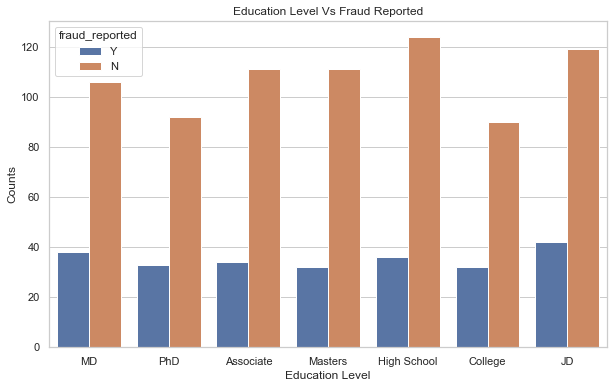

In [30]:
plt.figure(figsize=[10,6])
sns.countplot(x=df['insured_education_level'], hue=df['fraud_reported'], data=df)
plt.xlabel('Education Level')
plt.ylabel('Counts')
plt.title('Education Level Vs Fraud Reported')
plt.show()

In [31]:
df['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

<AxesSubplot:ylabel='insured_occupation'>

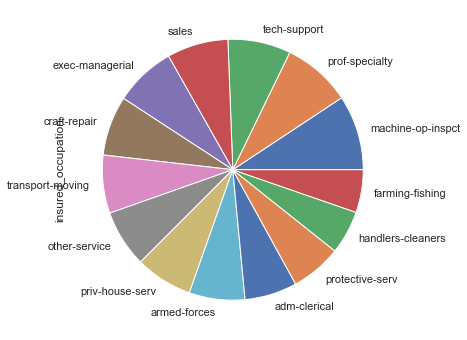

In [32]:
plt.figure(figsize=[6,6])
df['insured_occupation'].value_counts().plot.pie()

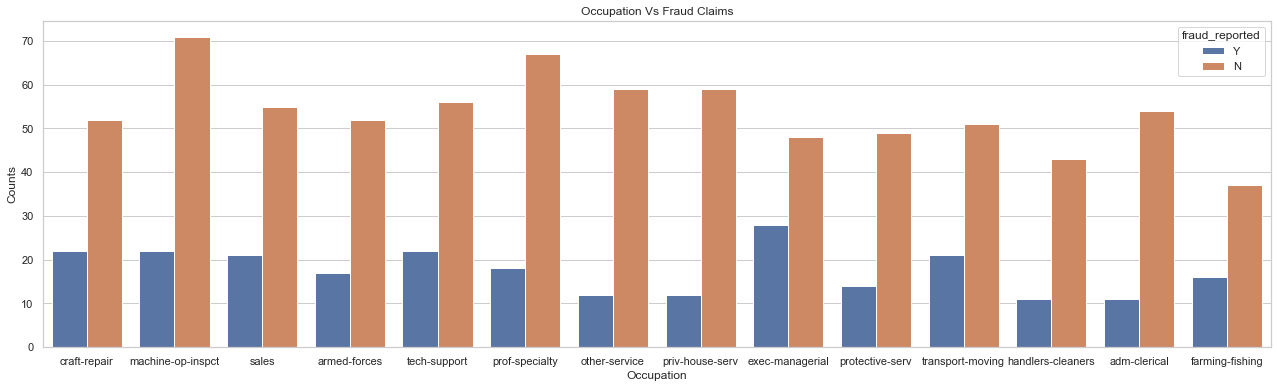

In [33]:
plt.figure(figsize=[22,6])
sns.countplot(x=df['insured_occupation'], hue=df['fraud_reported'], data=df)
plt.xlabel('Occupation')
plt.ylabel('Counts')
plt.title('Occupation Vs Fraud Claims')
plt.show()

In [34]:
df['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

<AxesSubplot:ylabel='insured_hobbies'>

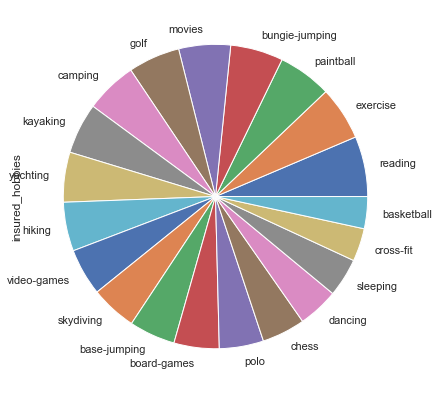

In [35]:
plt.figure(figsize=[7,7])
df['insured_hobbies'].value_counts().plot.pie()

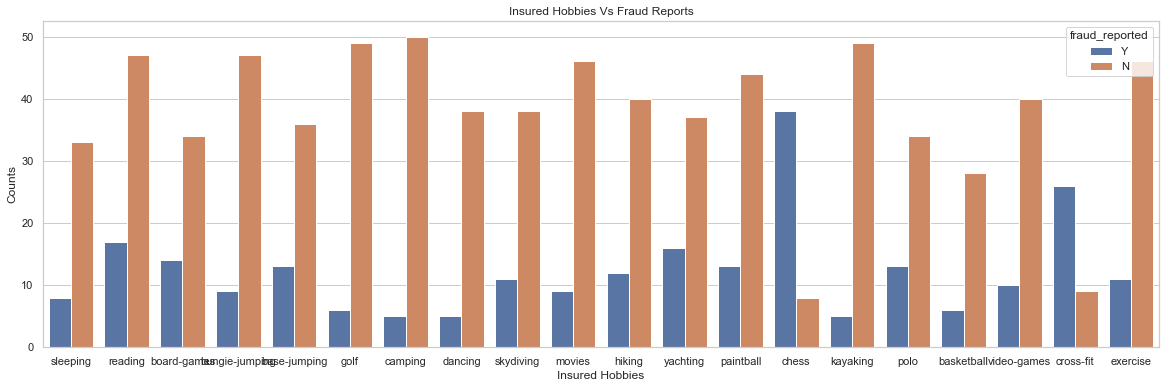

In [36]:
plt.figure(figsize=[20,6])
sns.countplot(x=df['insured_hobbies'], hue=df['fraud_reported'])
plt.xlabel('Insured Hobbies')
plt.ylabel('Counts')
plt.title('Insured Hobbies Vs Fraud Reports')
plt.show()

In [37]:
df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

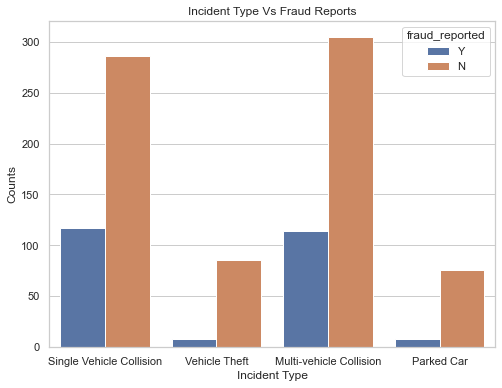

In [38]:
plt.figure(figsize=[8,6])
sns.countplot(x=df['incident_type'], hue=df['fraud_reported'], data=df)
plt.xlabel('Incident Type')
plt.ylabel('Counts')
plt.title('Incident Type Vs Fraud Reports')
plt.show()

In [39]:
df['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

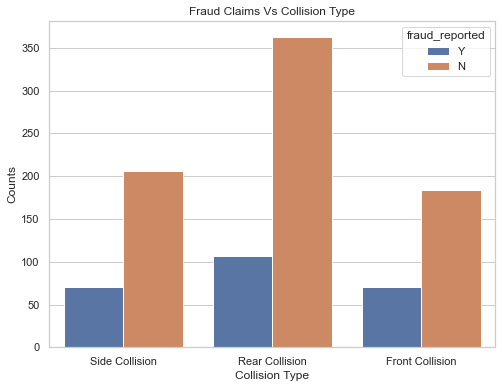

In [40]:
plt.figure(figsize=[8,6])
sns.countplot(x=df['collision_type'], hue=df['fraud_reported'])
plt.xlabel('Collision Type')
plt.ylabel('Counts')
plt.title('Fraud Claims Vs Collision Type')
plt.show()

In [41]:
df['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

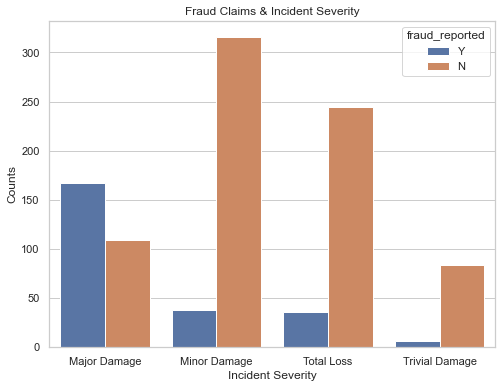

In [42]:
plt.figure(figsize=[8,6])
sns.countplot(x=df['incident_severity'], hue=df['fraud_reported'])
plt.xlabel('Incident Severity')
plt.ylabel('Counts')
plt.title('Fraud Claims & Incident Severity')
plt.show()

In [43]:
df['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

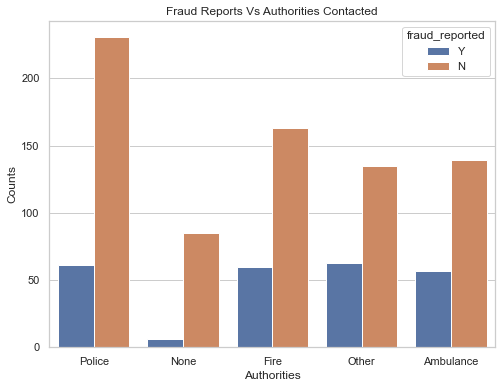

In [44]:
plt.figure(figsize=[8,6])
sns.countplot(x=df['authorities_contacted'], hue=df['fraud_reported'])
plt.xlabel('Authorities')
plt.ylabel('Counts')
plt.title('Fraud Reports Vs Authorities Contacted')
plt.show()

In [45]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

<AxesSubplot:ylabel='incident_state'>

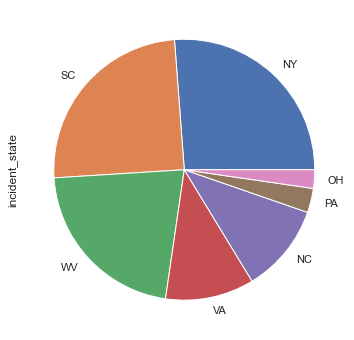

In [46]:
plt.figure(figsize=[6,6])
df['incident_state'].value_counts().plot.pie()

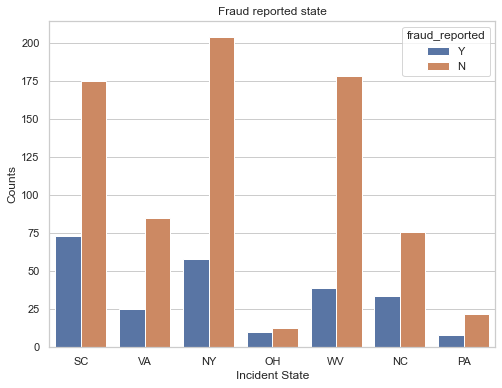

In [47]:
plt.figure(figsize=[8,6])
sns.countplot(x=df['incident_state'], hue=df['fraud_reported'])
plt.xlabel('Incident State')
plt.ylabel('Counts')
plt.title('Fraud reported state')
plt.show()

In [48]:
df['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

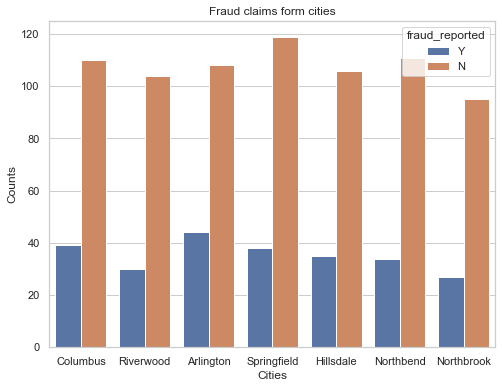

In [49]:
plt.figure(figsize=[8,6])
sns.countplot(x=df['incident_city'], hue=df['fraud_reported'])
plt.xlabel('Cities')
plt.ylabel('Counts')
plt.title('Fraud claims form cities')
plt.show()

In [50]:
df['number_of_vehicles_involved'].value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

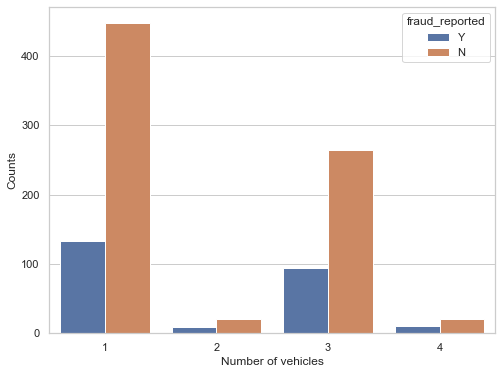

In [51]:
plt.figure(figsize=[8,6])
sns.countplot(x=df['number_of_vehicles_involved'], hue=df['fraud_reported'])
plt.xlabel('Number of vehicles')
plt.ylabel('Counts')
plt.show()

In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [53]:
le.fit(df['policy_state'].drop_duplicates())
le.classes_
df['policy_state'] = le.transform(df['policy_state'])

In [54]:
le.fit(df['policy_csl'].drop_duplicates())
le.classes_
df['policy_csl'] = le.transform(df['policy_csl'])

In [55]:
le.fit(df['insured_sex'].drop_duplicates())
le.classes_
df['insured_sex'] = le.transform(df['insured_sex'])

In [56]:
le.fit(df['insured_education_level'].drop_duplicates())
le.classes_
df['insured_education_level'] = le.transform(df['insured_education_level'])

In [57]:
le.fit(df['insured_occupation'].drop_duplicates())
le.classes_
df['insured_occupation'] = le.transform(df['insured_occupation'])

In [58]:
le.fit(df['insured_hobbies'].drop_duplicates())
le.classes_
df['insured_hobbies'] = le.transform(df['insured_hobbies'])

In [59]:
le.fit(df['insured_relationship'].drop_duplicates())
le.classes_
df['insured_relationship'] = le.transform(df['insured_relationship'])

In [60]:
le.fit(df['incident_type'].drop_duplicates())
le.classes_
df['incident_type'] = le.transform(df['incident_type'])

In [61]:
le.fit(df['collision_type'].drop_duplicates())
le.classes_
df['collision_type'] = le.transform(df['collision_type'])

In [62]:
le.fit(df['incident_severity'].drop_duplicates())
le.classes_
df['incident_severity'] = le.transform(df['incident_severity'])

In [63]:
le.fit(df['authorities_contacted'].drop_duplicates())
le.classes_
df['authorities_contacted'] = le.transform(df['authorities_contacted'])

In [64]:
le.fit(df['incident_state'].drop_duplicates())
le.classes_
df['incident_state'] = le.transform(df['incident_state'])

In [65]:
le.fit(df['incident_city'].drop_duplicates())
le.classes_
df['incident_city'] = le.transform(df['incident_city'])

In [66]:
le.fit(df['incident_location'].drop_duplicates())
le.classes_
df['incident_location'] = le.transform(df['incident_location'])

In [67]:
le.fit(df['property_damage'].drop_duplicates())
le.classes_
df['property_damage'] = le.transform(df['property_damage'])

In [68]:
le.fit(df['police_report_available'].drop_duplicates())
le.classes_
df['police_report_available'] = le.transform(df['police_report_available'])

In [69]:
le.fit(df['auto_make'].drop_duplicates())
le.classes_
df['auto_make'] = le.transform(df['auto_make'])

In [70]:
le.fit(df['auto_model'].drop_duplicates())
le.classes_
df['auto_model'] = le.transform(df['auto_model'])

In [71]:
le.fit(df['fraud_reported'].drop_duplicates())
le.classes_
df['fraud_reported'] = le.transform(df['fraud_reported'])

In [72]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_make,auto_model,auto_year,fraud_reported,day,Month,Year,incident_day,incident_month,incident_year
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,10,1,2004,1,17,10,2014,25,01,2015
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,8,12,2007,1,27,06,2006,21,01,2015
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,4,30,2007,0,06,09,2000,22,02,2015
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,3,34,2014,1,25,05,1990,10,01,2015
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,0,31,2009,0,06,06,2014,17,02,2015


array([[<AxesSubplot:title={'center':'months_as_customer'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'policy_number'}>,
        <AxesSubplot:title={'center':'policy_state'}>,
        <AxesSubplot:title={'center':'policy_csl'}>,
        <AxesSubplot:title={'center':'policy_deductable'}>],
       [<AxesSubplot:title={'center':'policy_annual_premium'}>,
        <AxesSubplot:title={'center':'umbrella_limit'}>,
        <AxesSubplot:title={'center':'insured_zip'}>,
        <AxesSubplot:title={'center':'insured_sex'}>,
        <AxesSubplot:title={'center':'insured_education_level'}>,
        <AxesSubplot:title={'center':'insured_occupation'}>],
       [<AxesSubplot:title={'center':'insured_hobbies'}>,
        <AxesSubplot:title={'center':'insured_relationship'}>,
        <AxesSubplot:title={'center':'capital-gains'}>,
        <AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'incident_type'}>,
        <AxesSubplot:ti

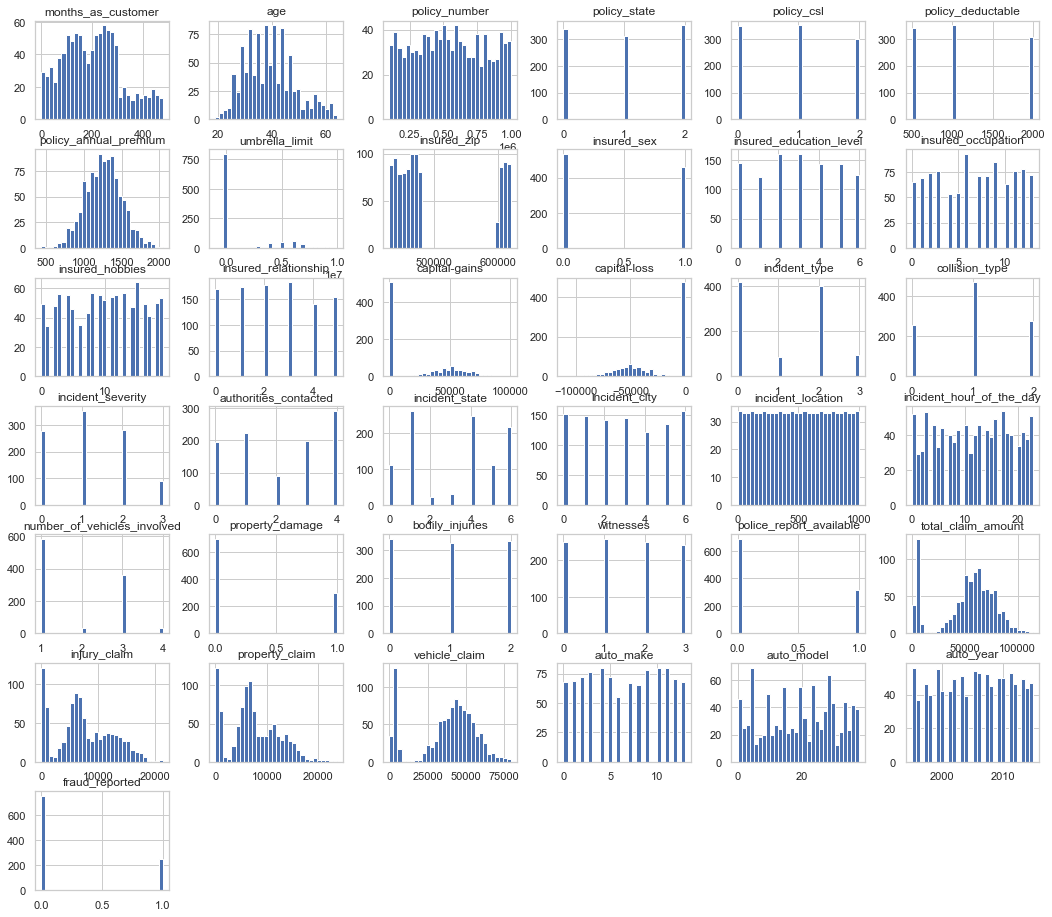

In [73]:
df.hist(figsize=[18,16], grid=True, layout=(7,6), bins=30)

In [74]:
df.describe()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,...,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,...,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,...,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,...,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,...,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


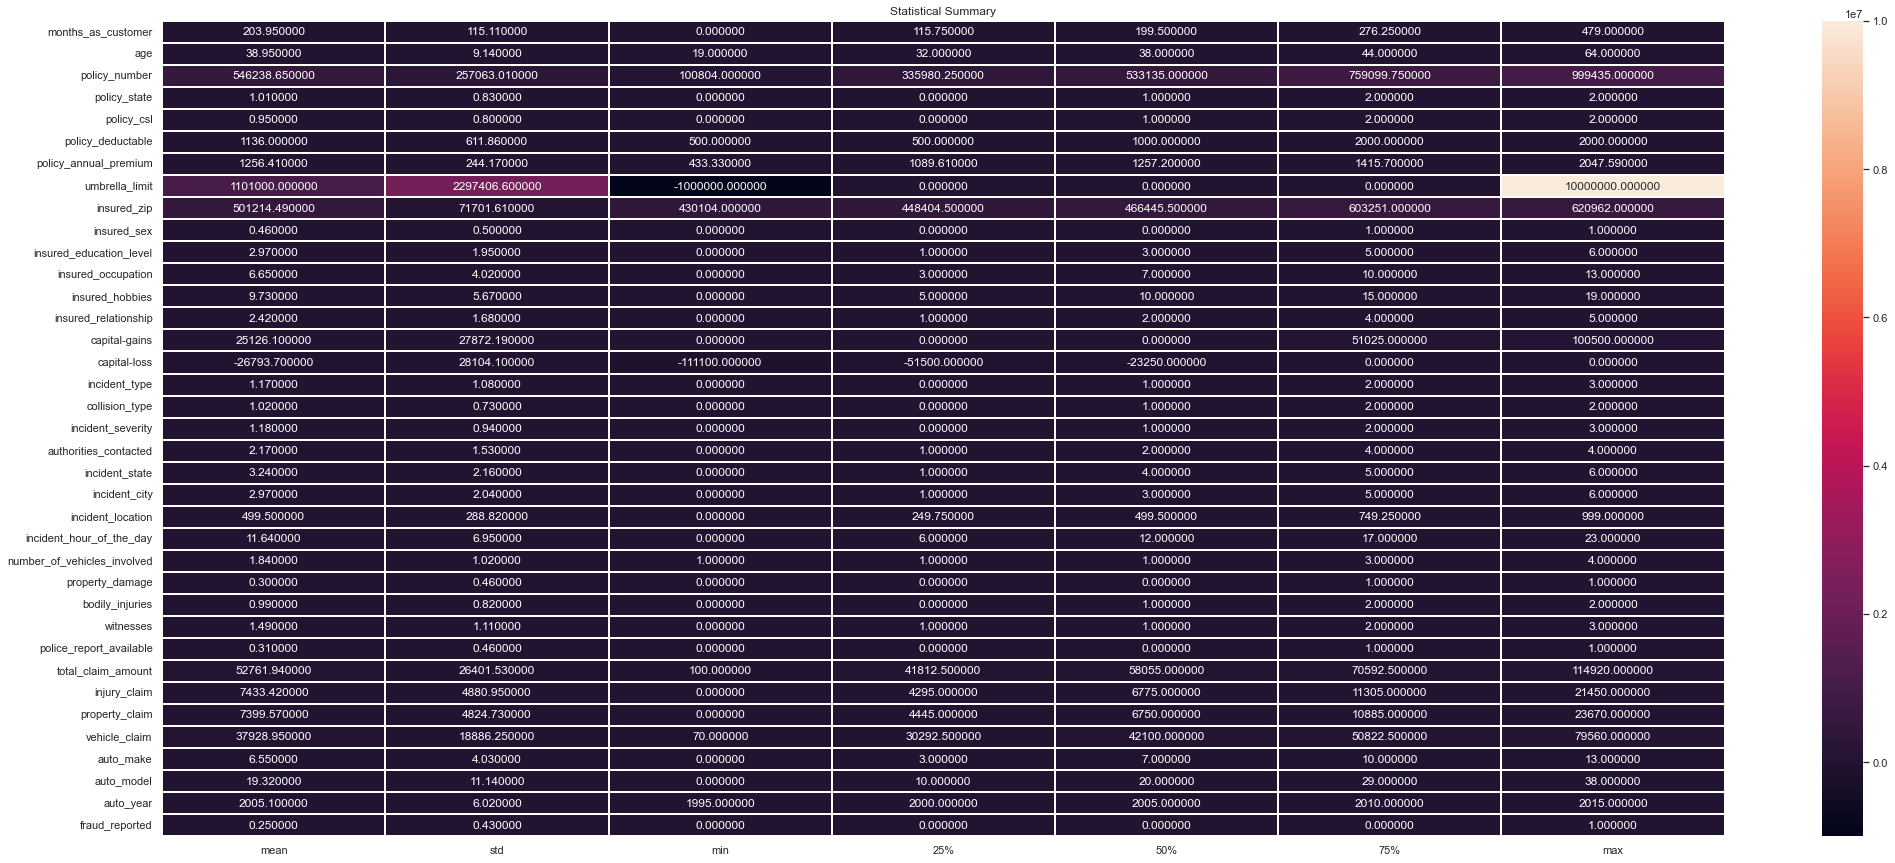

In [75]:
plt.figure(figsize=[35,15])
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.25, linecolor='white', fmt='f')
plt.title('Statistical Summary')
plt.show()

In [76]:
df.corr()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,...,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,...,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,0.004564,...,-0.012661,0.031190,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_state,-0.000328,-0.014533,0.072815,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,...,0.022960,0.069017,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.038917,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,...,0.071500,-0.001645,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.006738,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,...,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,...,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,...,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,...,0.019805,0.009841,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368
insured_sex,0.060925,0.073337,0.004564,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,...,0.042463,0.006992,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873


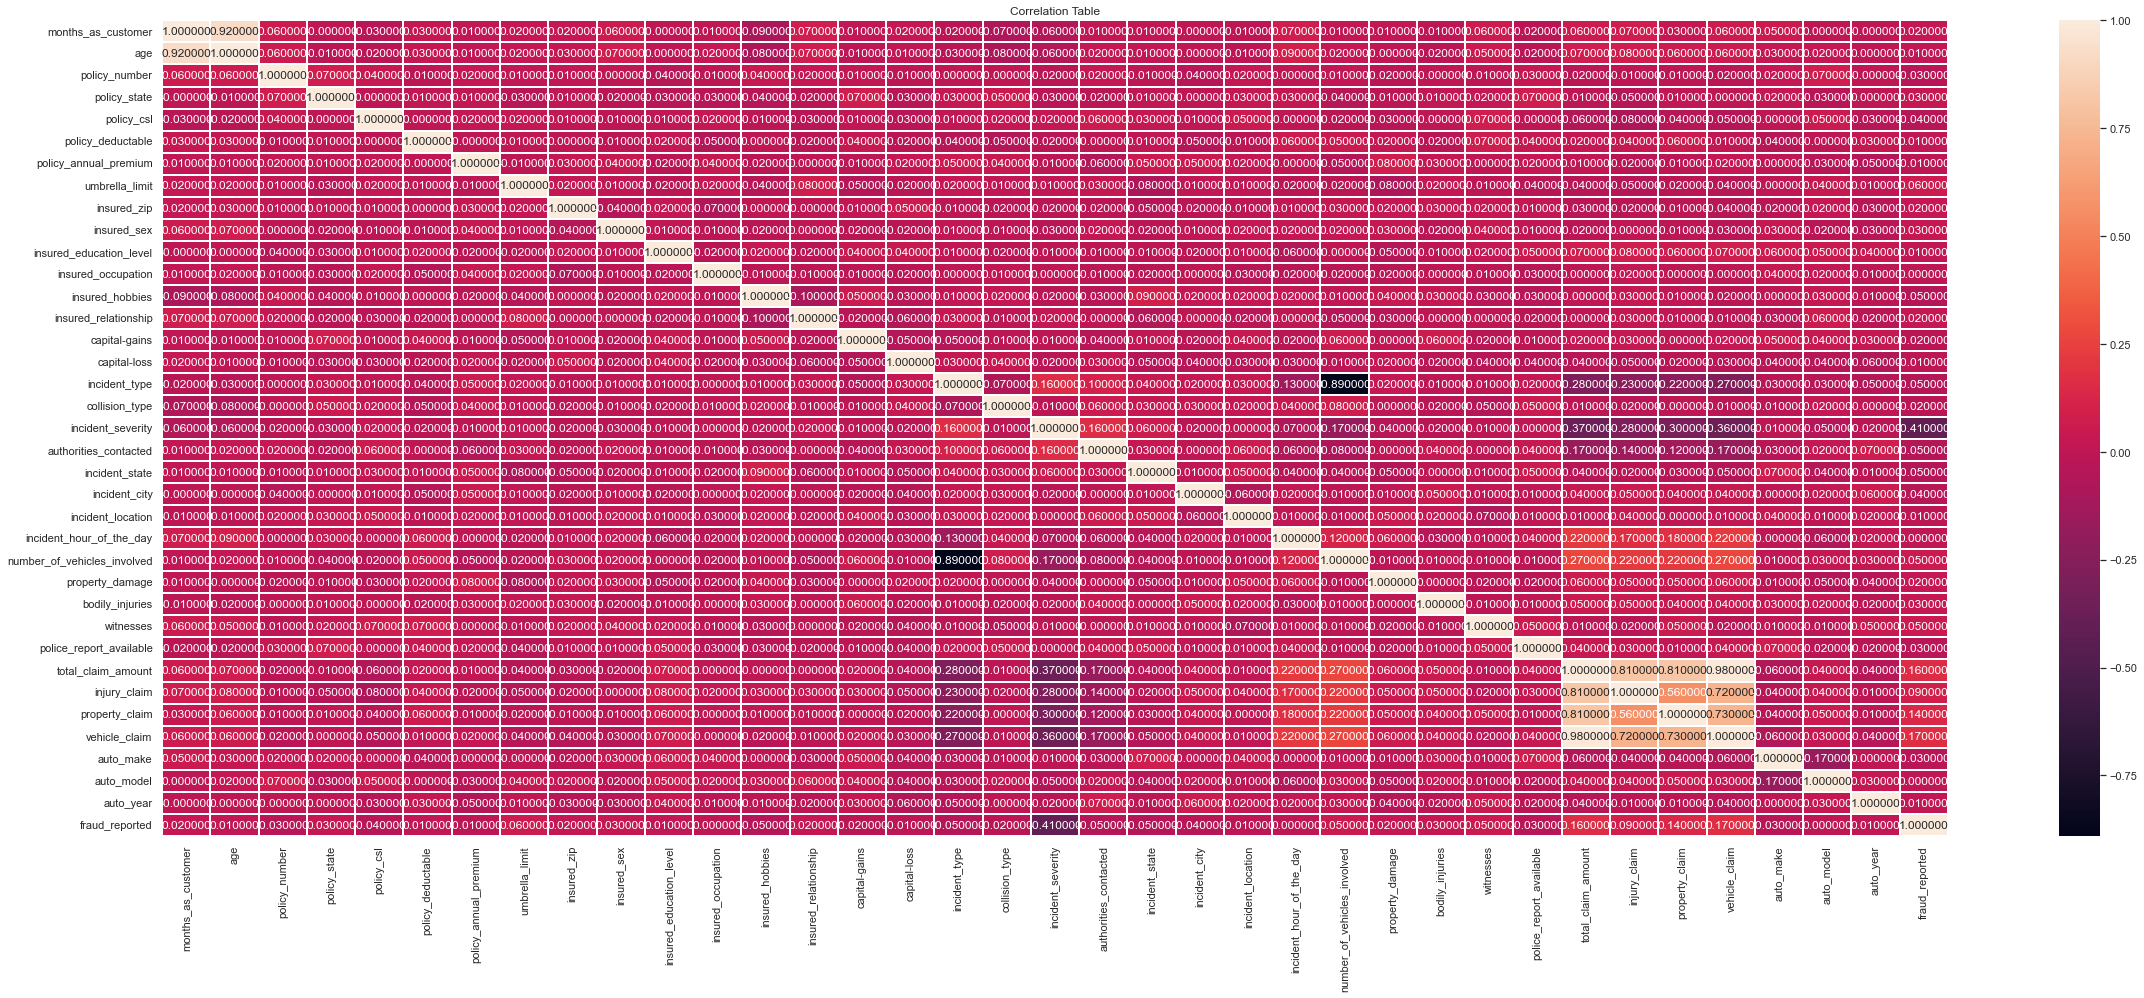

In [77]:
plt.figure(figsize=[40,15])
sns.heatmap(round(df.corr().transpose(),2), annot=True, linewidths=0.25, linecolor='white', fmt='f')
plt.title('Correlation Table')
plt.show()

In [78]:
corr_matrix = df.corr()
corr_matrix['fraud_reported'].sort_values(ascending = False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
property_damage                0.017202
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
incident_location             -0.008832
policy_annual_premium         -0.014480
capital-loss                  -0.014863


In [79]:
x = df.drop(["fraud_reported", "insured_relationship"], axis=1)
y = df['fraud_reported']

In [80]:
x.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806


In [81]:
from sklearn.preprocessing import power_transform

df_new = power_transform(x)

df_new = pd.DataFrame(df_new, columns = x.columns)

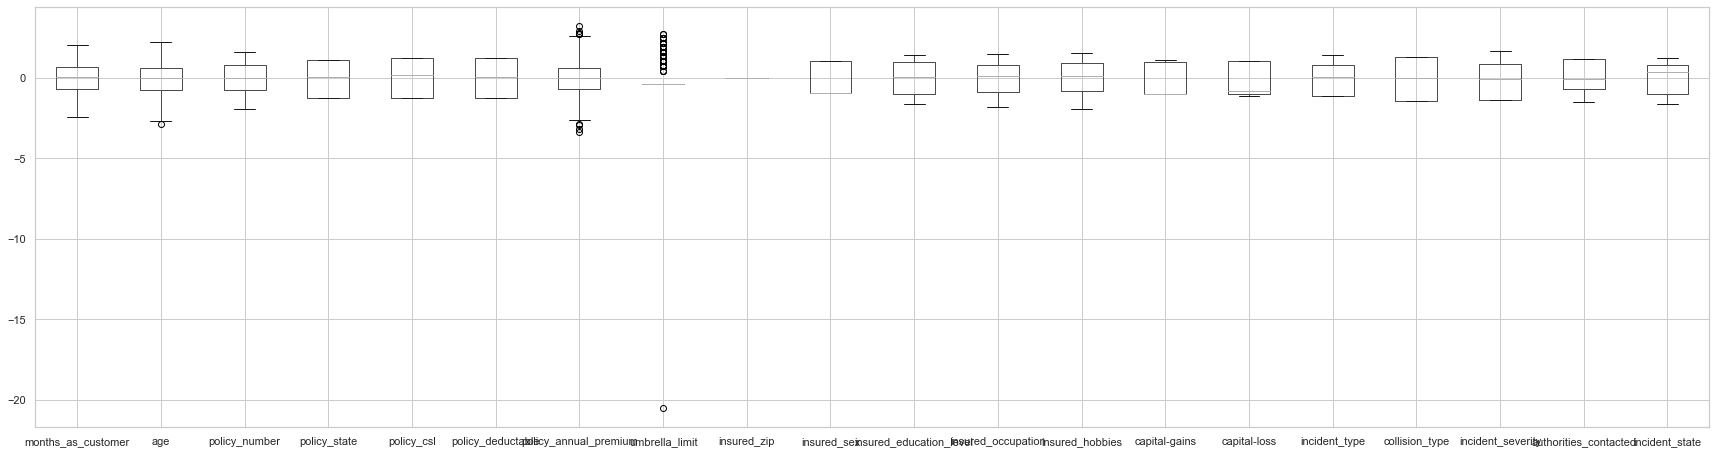

In [82]:
df_new.iloc[:,0:20].boxplot(figsize=[30,8])
plt.subplots_adjust(bottom = 0.15)
plt.show()

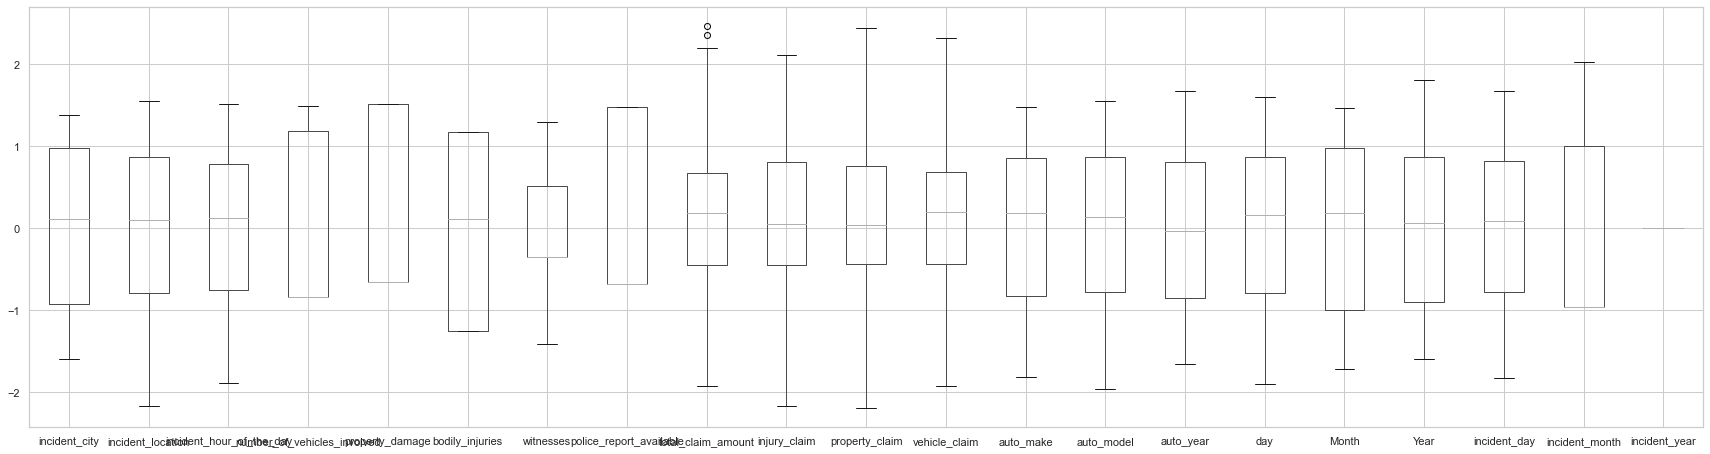

In [83]:
df_new.iloc[:,20:43].boxplot(figsize=[30,8])
plt.subplots_adjust(bottom = 0.15)
plt.show()

In [84]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

x_over, y_over = sm.fit_resample(x, y)

In [85]:
y_over.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

In [86]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,test_size=0.25,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)

The best accuracy is  0.6339522546419099  on Random_State  15


In [87]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_over,y_over, test_size=0.25, random_state=157)

In [88]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

LR.fit(x_train,y_train)
predlr = LR.predict(x_test)

print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

0.5941644562334217
[[120  72]
 [ 81 104]]
              precision    recall  f1-score   support

           0       0.60      0.62      0.61       192
           1       0.59      0.56      0.58       185

    accuracy                           0.59       377
   macro avg       0.59      0.59      0.59       377
weighted avg       0.59      0.59      0.59       377



In [89]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
predrf = RF.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))

0.8779840848806366
[[173  19]
 [ 27 158]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       192
           1       0.89      0.85      0.87       185

    accuracy                           0.88       377
   macro avg       0.88      0.88      0.88       377
weighted avg       0.88      0.88      0.88       377



In [90]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
preddt = DT.predict(x_test)

print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

0.7904509283819628
[[153  39]
 [ 40 145]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       192
           1       0.79      0.78      0.79       185

    accuracy                           0.79       377
   macro avg       0.79      0.79      0.79       377
weighted avg       0.79      0.79      0.79       377



In [91]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(x_train, y_train)
predsv = svc.predict(x_test)

print(accuracy_score(y_test, predsv))
print(confusion_matrix(y_test, predsv))
print(classification_report(y_test, predsv))

0.4986737400530504
[[153  39]
 [150  35]]
              precision    recall  f1-score   support

           0       0.50      0.80      0.62       192
           1       0.47      0.19      0.27       185

    accuracy                           0.50       377
   macro avg       0.49      0.49      0.44       377
weighted avg       0.49      0.50      0.45       377



In [92]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x, y, cv=5)
print("Cross validation score for LogisticRegresssion is ", scr.mean())

Cross validation score for LogisticRegresssion is  0.7499999999999999


In [93]:
scr = cross_val_score(RF, x, y, cv = 5)
print("Cross validation score for RandonForestClassifier is ", scr.mean())

Cross validation score for RandonForestClassifier is  0.771


In [94]:
scr = cross_val_score(DT, x, y, cv =5)
print("Cross validation score for DecisionTreeClassifier is ", scr.mean())

Cross validation score for DecisionTreeClassifier is  0.783


In [95]:
scr = cross_val_score(svc, x, y, cv=5)
print("Cross validation score for SVC is ", scr.mean())

Cross validation score for SVC is  0.7529999999999999


In [96]:
from sklearn.model_selection import GridSearchCV

#DecisionTreeClassifier:
params = {'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]}

In [97]:
GCV = GridSearchCV(DecisionTreeClassifier(), params, cv=3)

In [98]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]})

In [99]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50}

In [100]:
model = DecisionTreeClassifier(criterion= 'gini', max_depth= 3, min_samples_leaf = 50)
model.fit(x_train, y_train)
pred = model.predict(x_test)

print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8541114058355438
[[163  29]
 [ 26 159]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       192
           1       0.85      0.86      0.85       185

    accuracy                           0.85       377
   macro avg       0.85      0.85      0.85       377
weighted avg       0.85      0.85      0.85       377



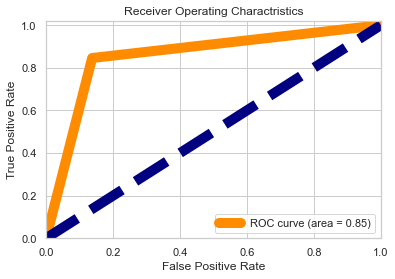

In [101]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color ='darkorange', lw=10, label ='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Charactristics')
plt.legend(loc='lower right')

plt.show()

In [102]:
import pickle
filename = 'insurance_claims_fraud_detection.pkl'
pickle.dump(model, open(filename, 'wb'))

In [103]:
a = np.array(y_test)
predicted = np.array(model.predict(x_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

,Original,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
372,0,0
373,1,0
374,1,1
375,1,1
